# Fraud Detection System with Web App Usage Application

#### This project uses a logistic regression model to detect fraudulent transactions. It uses a Kaggle public dataset from which exploratory Data Analysis is performed. In the second half, I conduct Feature Engineering and begind training the model using a logistic regression pipeline. 

The categorical and numerical features used in the moment were transformed using OneHotEncoder and StandardScaler respectively.

## Step 1: Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns       


In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")# Load the dataset

In [7]:
df = pd.read_csv('AIML Dataset.csv')
df.head()  # Display the first few rows of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df["isFraud"].value_counts()  # Count the occurrences of each value in the 'isFlaggedFraud' column

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
df["isFlaggedFraud"].value_counts()  # Count the occurrences of each value in the 'isFlaggedFraud' column

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
df.isnull().sum()  # Check for missing values in the DataFrame

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df.shape

(6362620, 11)

In [18]:
round(df["isFraud"].value_counts()[1]/ df["isFraud"].value_counts()[0]*100,2)  # Calculate the ratio of fraudulent to non-fraudulent transactions

np.float64(0.13)

Text(0, 0.5, 'Count')

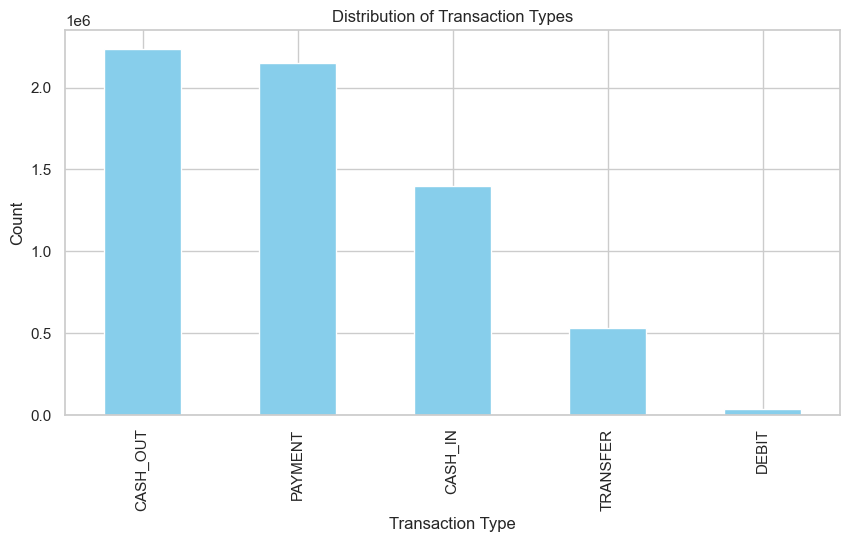

In [19]:
df["type"].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')  # Plot the distribution of transaction types
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')


Text(0, 0.5, 'Fraud Rate')

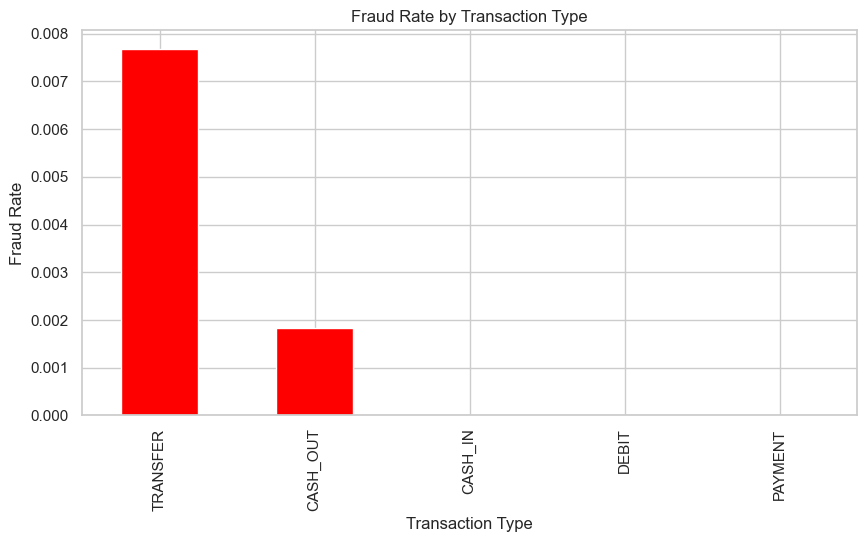

In [20]:
fraud_by_types = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_types.plot(kind='bar', figsize=(10, 5), color='red')
plt.title('Fraud Rate by Transaction Type') 
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')

In [ ]:
fraud_by_types # Display the fraud rate by transaction type, making sure which have zero

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [25]:
df["amount"].describe().astype(int)  # Get descriptive statistics for the 'amount' column

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Text(0, 0.5, 'Frequency')

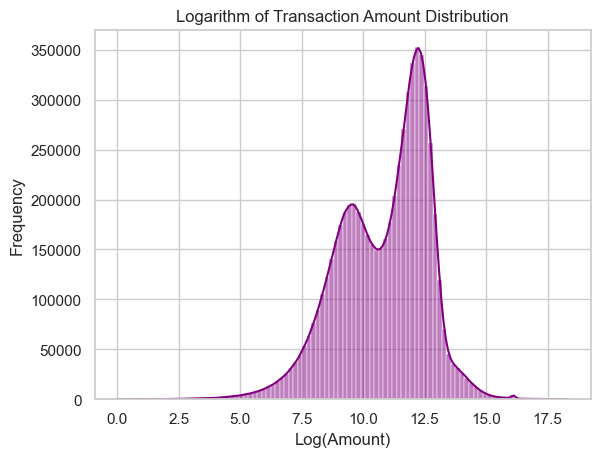

In [26]:
sns.histplot(np.log1p(df["amount"]), bins=100,kde=True, color='purple')  # Plot a histogram of the logarithm of the 'amount' column
plt.title('Logarithm of Transaction Amount Distribution')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of Transaction Amount by Fraud Status')

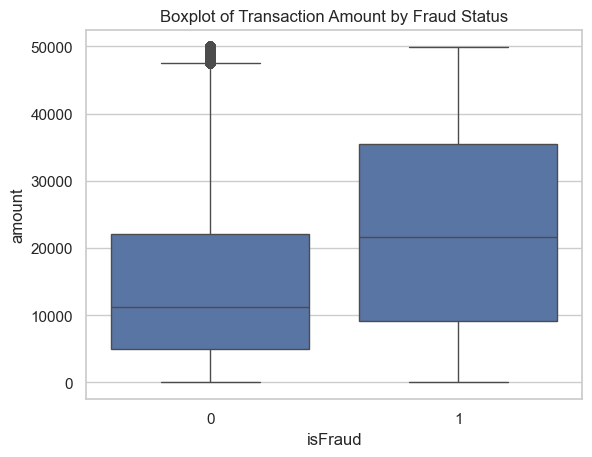

In [ ]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud", y="amount")
plt.title('Boxplot of Transaction Amount by Fraud Status')
plt.show

In [30]:
df["balanceDiffOrig"]= df["oldbalanceOrg"] - df["newbalanceOrig"]  # Calculate the difference in balance for the origin account
df["balanceDiffDest"]= df["newbalanceDest"] - df["oldbalanceDest"]  # Calculate the difference in balance for the destination account

In [36]:
(df["balanceDiffOrig"] < 0).sum()  # Count the number of negative balance differences for the origin account


np.int64(1399253)

In [37]:
(df["balanceDiffDest"] < 0).sum()  # Count the number of negative balance differences for the destination account

np.int64(1238864)

In [39]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


Text(0.5, 1.0, 'Number of Frauds per Step')

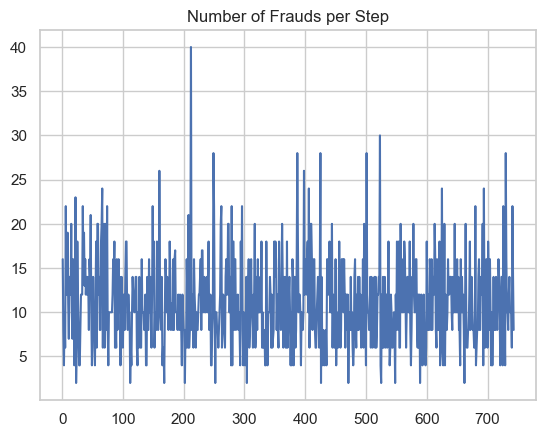

In [43]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()  # Group by 'step' and sum the 'isFraud' values
plt.plot(frauds_per_step.index,frauds_per_step.values)
plt.title('Number of Frauds per Step')


In [47]:
df.drop(columns = "step",inplace=True)  # Drop the 'step' column from the DataFrame

In [48]:
df.head()  # Display the first few rows of the DataFrame to see the new columns

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [49]:
top_senders = df["nameOrig"].value_counts().head(10)  # Get the top 10 senders by transaction count

In [50]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [51]:
top_receivers = df["nameDest"].value_counts().head(10)  # Get the top 10 receivers by transaction count

In [52]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [53]:
fraud_users = df[df["isFraud"]==1] ["nameOrig"].value_counts().head(10)  # Get the top 10 users who initiated fraudulent transactions
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [55]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]  # Filter the DataFrame for specific transaction types
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


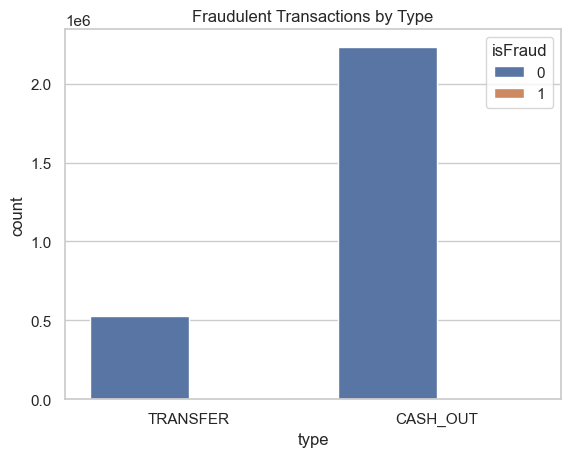

In [57]:
sns.countplot(data=fraud_types,x="type", hue="isFraud")
plt.title('Fraudulent Transactions by Type')
plt.show()

In [60]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()  # Calculate the correlation matrix for specific columns

In [ ]:
corr #a correlation matric can take values between -1 and 1, where 1 means perfect positive correlation, -1 means perfect negative correlation, and 0 means no correlation

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

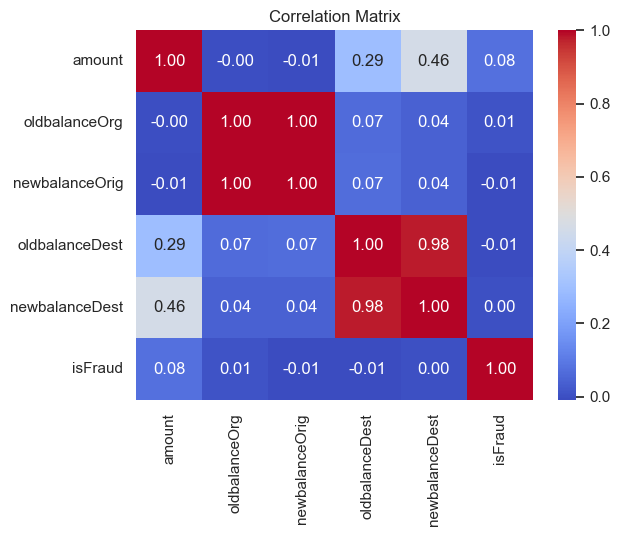

In [62]:
sns.heatmap(corr,annot = True, cmap='coolwarm', fmt='.2f')  # Plot a heatmap of the correlation matrix
plt.title('Correlation Matrix')

In [66]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))]

In [67]:
len(zero_after_transfer)

1188074

In [69]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89



## Step 2: Feature Engineering & Model Training

In [70]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function from sklearn
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler for feature scaling
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import metrics for model evaluation
from sklearn.pipeline import Pipeline  # Import the Pipeline class for creating a machine learning pipeline 
from sklearn.compose import ColumnTransformer  # Import the ColumnTransformer for preprocessing different types of data
from sklearn.preprocessing import OneHotEncoder  # Import the OneHotEncoder for categorical feature encoding

In [73]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"],axis=1)

In [74]:
df_model.head()  # Display the first few rows of the DataFrame after dropping specified columns


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [75]:
categorical_features = ["type"]  # Define the categorical features for one-hot encoding
numerical_features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]  # Define the numerical features for scaling

In [76]:
y= df_model["isFraud"]
x= df_model.drop("isFraud",axis=1)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify= y)

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(drop="first"), categorical_features)  # Apply OneHotEncoder to categorical features
    ],
    remainder="drop"
)

In [80]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("classifier",LogisticRegression(class_weight="balanced", max_iter=1000))
])# Create a machine learning pipeline with preprocessing and classification steps

In [81]:
pipeline.fit(x_train, y_train)  # Fit the pipeline to the training data

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [82]:
y_pred = pipeline.predict(x_test)

In [84]:
print(classification_report(y_test, y_pred))  # Generate a classification report to evaluate the model's performance

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [86]:
confusion_matrix(y_test, y_pred)  # Generate a confusion matrix to evaluate the model's performance

array([[1800971,  105351],
       [    128,    2336]])

In [88]:
pipeline.score(x_test, y_test) * 100  # Evaluate the model's performance on the test set

94.47402694697048

In [89]:
import joblib  # Import joblib for saving the model

joblib.dump(pipeline, 'fraud_detection_model.pkl')  # Save the trained model to a file

['fraud_detection_model.pkl']

# Step 3: Model Deployement in Local Web App

The model is saved locally at the end of execution of this notebook. A separate Python file was prepared with StreamLit to deploy the model onto a web application for user input.

After running this notebook successfully, download the Fraud_Detection_webapp.py file from the repository and run the following command in the terminal in order to launch the web application:
```powershell 
    #Run this command in the Terminal:
    streamlit run Fraud_Detection_webapp.py
```

Here is an example of the web application:

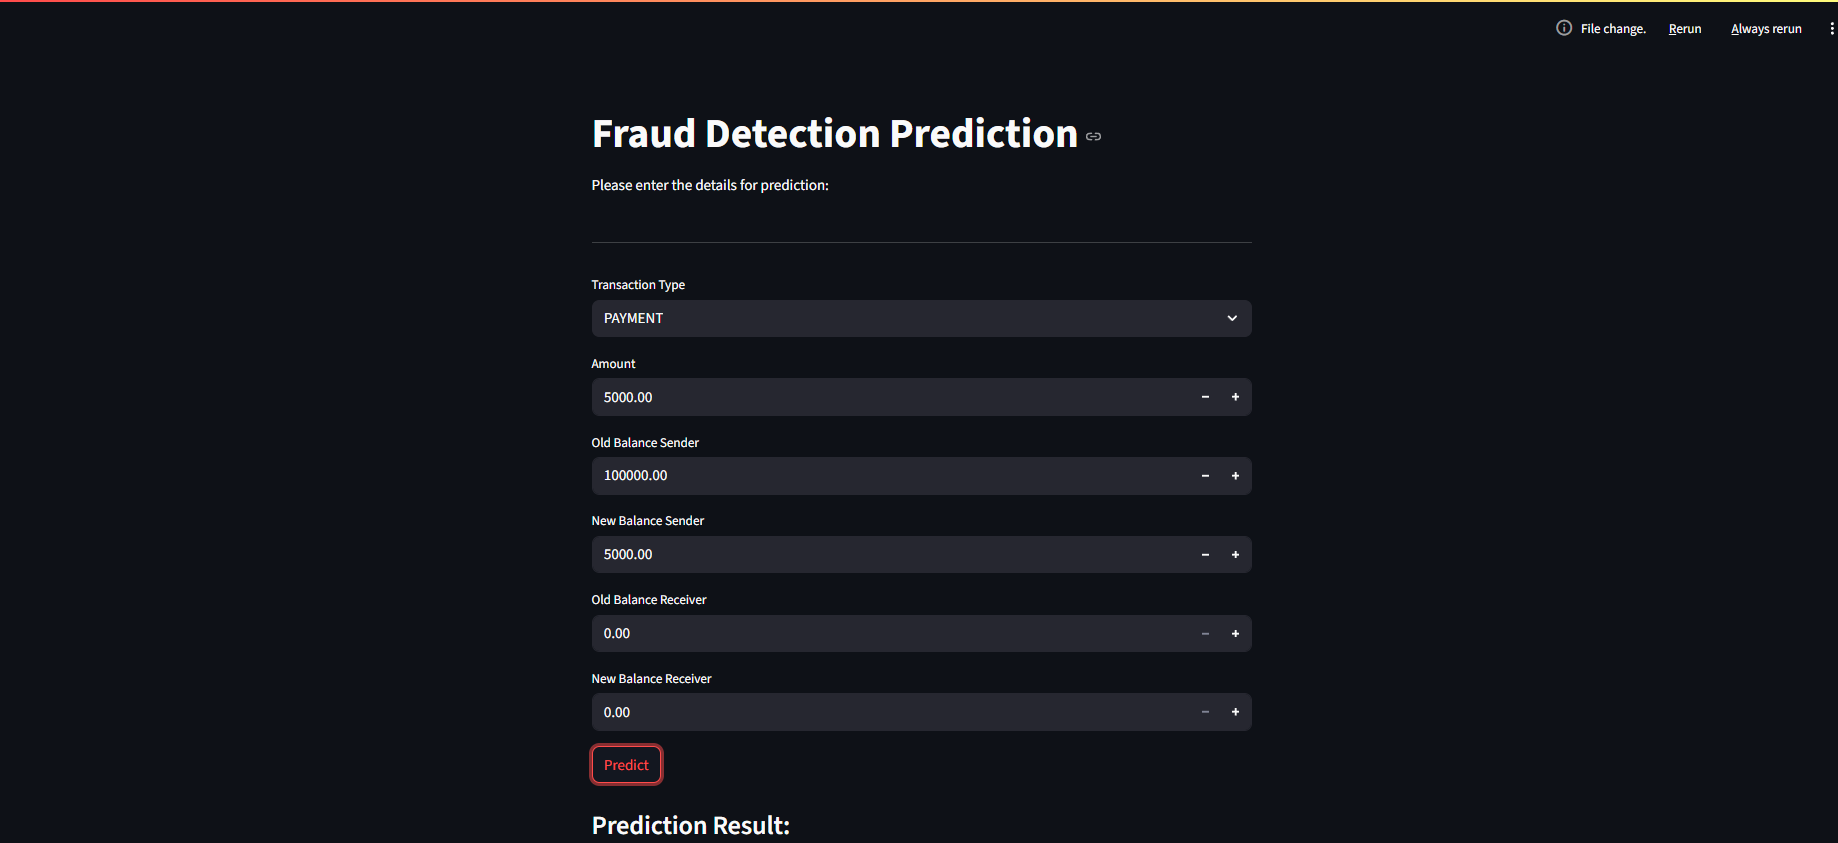